## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [62]:
import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

%matplotlib inline

In [63]:
a = np.random.rand(5, 3) # создали случайную матрицу 
a

array([[0.9335223 , 0.96615073, 0.44629363],
       [0.49585081, 0.69962867, 0.77085305],
       [0.16049127, 0.37705685, 0.33039691],
       [0.43213812, 0.2360329 , 0.36131429],
       [0.27409531, 0.83068318, 0.96781028]])

In [64]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [65]:
print("Добавили 5 :\n%s\n" % (a + 5))

Добавили 5 :
[[5.9335223  5.96615073 5.44629363]
 [5.49585081 5.69962867 5.77085305]
 [5.16049127 5.37705685 5.33039691]
 [5.43213812 5.2360329  5.36131429]
 [5.27409531 5.83068318 5.96781028]]



In [66]:
print("X*X^T  :\n%s\n" % np.dot(a, a.T))

X*X^T  :
[[2.00408912 1.48286134 0.66156997 0.7927062  1.4903668 ]
 [1.48286134 1.32956273 0.59806698 0.65793165 1.46311965]
 [0.66156997 0.59806698 0.27709144 0.27772935 0.67696622]
 [0.7927062  0.65793165 0.27772935 0.3730029  0.66419928]
 [1.4903668  1.46311965 0.67696622 0.66419928 1.70181952]]



In [67]:
print("Среднее по колонкам :\n%s\n" % (a.mean(axis=-1)))

Среднее по колонкам :
[0.78198889 0.65544418 0.28931501 0.34316177 0.69086292]



In [68]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
(3, 5)



Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [70]:
x = torch.randn(5, 3)
x

tensor([[-1.7363,  0.5465,  0.6499],
        [-0.6406,  0.6402,  0.0836],
        [-0.1147, -0.6027,  0.7368],
        [-0.4360, -1.0165, -0.5932],
        [ 0.0531,  1.2238, -1.4686]])

In [71]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [72]:
print("Добавили 5 :\n%s\n" % (x + 5))

Добавили 5 :
tensor([[3.2637, 5.5465, 5.6499],
        [4.3594, 5.6402, 5.0836],
        [4.8853, 4.3973, 5.7368],
        [4.5640, 3.9835, 4.4068],
        [5.0531, 6.2238, 3.5314]])



In [73]:
print("X*X^T  (1):\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n%s\n" % (x.mm(x.t())))

X*X^T  (1):
tensor([[ 3.7359,  1.5164,  0.3486, -0.1840, -0.3779],
        [ 1.5164,  0.8271, -0.2508, -0.4210,  0.6266],
        [ 0.3486, -0.2508,  0.9193,  0.2255, -1.8257],
        [-0.1840, -0.4210,  0.2255,  1.5753, -0.3959],
        [-0.3779,  0.6266, -1.8257, -0.3959,  3.6572]])

X*X^T  (2):
tensor([[ 3.7359,  1.5164,  0.3486, -0.1840, -0.3779],
        [ 1.5164,  0.8271, -0.2508, -0.4210,  0.6266],
        [ 0.3486, -0.2508,  0.9193,  0.2255, -1.8257],
        [-0.1840, -0.4210,  0.2255,  1.5753, -0.3959],
        [-0.3779,  0.6266, -1.8257, -0.3959,  3.6572]])



In [74]:
x @ x.T

tensor([[ 3.7359,  1.5164,  0.3486, -0.1840, -0.3779],
        [ 1.5164,  0.8271, -0.2508, -0.4210,  0.6266],
        [ 0.3486, -0.2508,  0.9193,  0.2255, -1.8257],
        [-0.1840, -0.4210,  0.2255,  1.5753, -0.3959],
        [-0.3779,  0.6266, -1.8257, -0.3959,  3.6572]])

In [75]:
x_np = x.numpy()

In [77]:
x_np @ x_np.T

array([[ 3.735947  ,  1.5164378 ,  0.34858826, -0.18396717, -0.37786105],
       [ 1.5164378 ,  0.82714176, -0.25077504, -0.42103806,  0.6266348 ],
       [ 0.34858826, -0.25077504,  0.9192914 ,  0.22551334, -1.8257462 ],
       [-0.18396717, -0.42103806,  0.22551334,  1.575303  , -0.39591295],
       [-0.37786105,  0.6266348 , -1.8257462 , -0.39591295,  3.6572342 ]],
      dtype=float32)

In [78]:
np.dot(x_np, x_np.T)

array([[ 3.735947  ,  1.5164378 ,  0.34858826, -0.18396717, -0.37786105],
       [ 1.5164378 ,  0.82714176, -0.25077504, -0.42103806,  0.6266348 ],
       [ 0.34858826, -0.25077504,  0.9192914 ,  0.22551334, -1.8257462 ],
       [-0.18396717, -0.42103806,  0.22551334,  1.575303  , -0.39591295],
       [-0.37786105,  0.6266348 , -1.8257462 , -0.39591295,  3.6572342 ]],
      dtype=float32)

In [79]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=-1)))

Среднее по колонкам :
tensor([-0.1800,  0.0277,  0.0065, -0.6819, -0.0639])



In [80]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


### Создаем тензоры в pytorch и снова изучаем базовые операции

In [85]:
x = torch.empty(5, 3) # пустой тензор
print(x)

tensor([[0.0000e+00, 2.0000e+00, 0.0000e+00],
        [2.0000e+00, 1.1210e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [86]:
x = torch.rand(5, 3) # тензор со случайными числами
print(x)

tensor([[0.3675, 0.6509, 0.2667],
        [0.8204, 0.7964, 0.5149],
        [0.4762, 0.9833, 0.2779],
        [0.0507, 0.6167, 0.6930],
        [0.4670, 0.2185, 0.8258]])


In [89]:
x = torch.zeros(5, 3) # тензор с нулями
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [90]:
x = torch.zeros(5, 3, dtype=torch.long) # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [91]:
x = torch.tensor([5.5, 3]) # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [92]:
x = torch.tensor([5.5, 3], dtype=torch.long)
print(x)

tensor([5, 3])


In [93]:
x = x.new_ones(5, 3, dtype=torch.double) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [94]:
x = torch.randn_like(x, dtype=torch.float) # создаем матрицу с размерами как у x
print(x, x.size())

tensor([[ 0.8464, -0.2641, -0.2644],
        [ 1.3366, -0.0520,  0.6821],
        [-0.1560,  1.7854, -0.5661],
        [-1.8621, -1.2857,  1.6207],
        [ 0.9705,  0.1786,  2.3693]]) torch.Size([5, 3])


In [95]:
y = torch.rand(5, 3)
print(x + y) # операция сложение

tensor([[ 1.1078,  0.7234,  0.1538],
        [ 1.3651,  0.7766,  1.2377],
        [ 0.7150,  1.8459, -0.1147],
        [-1.2460, -1.1934,  1.8798],
        [ 1.4986,  1.1310,  2.5576]])


In [96]:
z = torch.add(x, y) # очередная операция сложения
print(z)

tensor([[ 1.1078,  0.7234,  0.1538],
        [ 1.3651,  0.7766,  1.2377],
        [ 0.7150,  1.8459, -0.1147],
        [-1.2460, -1.1934,  1.8798],
        [ 1.4986,  1.1310,  2.5576]])


In [97]:
torch.add(x, y, out=z) # и наконец последний вид
print(z)

tensor([[ 1.1078,  0.7234,  0.1538],
        [ 1.3651,  0.7766,  1.2377],
        [ 0.7150,  1.8459, -0.1147],
        [-1.2460, -1.1934,  1.8798],
        [ 1.4986,  1.1310,  2.5576]])


In [98]:
print(x * y) # поэлементное умножение

tensor([[ 0.2213, -0.2608, -0.1106],
        [ 0.0380, -0.0431,  0.3790],
        [-0.1359,  0.1081, -0.2556],
        [-1.1473, -0.1186,  0.4198],
        [ 0.5126,  0.1701,  0.4462]])


In [99]:
print(x @ y.t()) # матричное умножение

tensor([[-0.1501, -0.3417,  0.6018,  0.4286,  0.1457],
        [ 0.5835,  0.3739,  1.4690,  0.9955,  0.7849],
        [ 1.4854,  1.1604, -0.2834, -0.0781,  1.5114],
        [-1.0785, -0.2178, -0.9681, -0.8461, -1.9028],
        [ 1.4211,  1.4920,  1.9257,  1.2282,  1.1289]])


In [100]:
print(x.mm(y.t())) # и опять матричное умножение

tensor([[-0.1501, -0.3417,  0.6018,  0.4286,  0.1457],
        [ 0.5835,  0.3739,  1.4690,  0.9955,  0.7849],
        [ 1.4854,  1.1604, -0.2834, -0.0781,  1.5114],
        [-1.0785, -0.2178, -0.9681, -0.8461, -1.9028],
        [ 1.4211,  1.4920,  1.9257,  1.2282,  1.1289]])


In [103]:
x

tensor([[ 0.8464, -0.2641, -0.2644],
        [ 1.3366, -0.0520,  0.6821],
        [-0.1560,  1.7854, -0.5661],
        [-1.8621, -1.2857,  1.6207],
        [ 0.9705,  0.1786,  2.3693]])

In [104]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга 
print(x.unsqueeze(1).shape) 

torch.Size([1, 5, 3])
torch.Size([5, 1, 3])


In [105]:
x.unsqueeze(0)

tensor([[[ 0.8464, -0.2641, -0.2644],
         [ 1.3366, -0.0520,  0.6821],
         [-0.1560,  1.7854, -0.5661],
         [-1.8621, -1.2857,  1.6207],
         [ 0.9705,  0.1786,  2.3693]]])

In [106]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга 

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [107]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### Работаем с градиентами руками

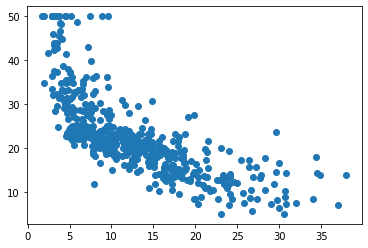

In [108]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

<img src="./example1.png">

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [191]:
w = torch.tensor([3.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

x = torch.tensor([8], dtype=torch.float32)
y = torch.tensor([1], dtype=torch.float32)

assert w.grad is None
assert b.grad is None

In [192]:
y_pred = (w * w) * x + b # и опять совершаем операции с тензорами
loss = y_pred.mean()
loss.backward()

In [193]:
y_pred.mean()

tensor(73., grad_fn=<MeanBackward0>)

In [194]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([48.])
dL/db = 
 tensor([1.])


In [167]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

In [168]:
y_pred = w * x + b # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # совершаем операции с тензорами
loss.backward() # считаем градиенты

In [169]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.0366])
dL/db = 
 tensor([-43.8809])


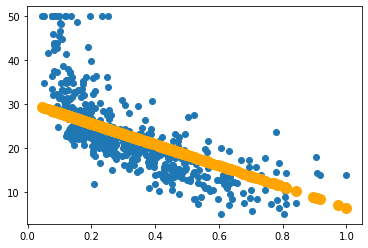

loss =  43.725235


In [116]:
from IPython.display import clear_output

for i in range(400):

    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad.data 
    b.data -= 0.05 * b.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


### Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения

#### Как формировать батчи и пихать их в сетку

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса должно быть два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [124]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    x.shape = (N, d), where N = number of examples, and d = number of features
    y.shape = (N, )
    """
    
    def __init__(self, x, y):
        
        self.x=x
        self.y=y
    
    def __getitem__(self, idx):
        """
        Эта функция должна возвращать словарь с одним элементом из выборки и ответом
        Не забудьте преобразовать пример в формат тензора
        """
        
        return {'sample': YOUR_CODE_HERE, 'target': YOUR_CODE_HERE}
    
    def __len__(self):
        return len(self.x)

In [125]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [126]:
our_dataset = RandomDataset(x, y)

In [127]:
our_dataset.__getitem__(1)

{'sample': tensor([0.0848, 0.7323, 0.6332, 0.4138, 0.5216]),
 'target': 0.8628841592196147}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [128]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [129]:
for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break
print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.4491, 0.9253, 0.7178, 0.0031, 0.1885],
        [0.0848, 0.7323, 0.6332, 0.4138, 0.5216],
        [0.7570, 0.4549, 0.4771, 0.3897, 0.9243],
        [0.6541, 0.3439, 0.5847, 0.3647, 0.8032]])
Target: tensor([0.5270, 0.8629, 0.0989, 0.5239], dtype=torch.float64)


#### Как сделать сетку

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [130]:
model = nn.Sequential() # создаем пустую модель, в которую будем добавлять слои
model.add_module('l1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('l2', nn.ReLU()) # добавили функцию активации
model.add_module('l3', nn.Linear(3, 1)) # добавили слой с 3-мя нейронами на вход и 5-ю на выход

In [131]:
y_pred = model(batch_x) # получили предсказания модели

In [135]:
y_pred

tensor([[-0.0812],
        [-0.0478],
        [-0.1011],
        [-0.0870]], grad_fn=<AddmmBackward>)

#### Как написать цикл обучения
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [136]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True, 
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для тренировки
mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

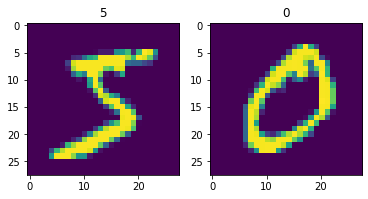

In [137]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [138]:
model = nn.Sequential(
    nn.Flatten(), # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(), # функция активации релу
    nn.Linear(128, 10), # функция активации релу
    nn.Softmax(dim=-1) # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # создаем оптимизатор и передаем туда параметры модели

Веса моделей хранятся в виде матриц и выглядят так:

In [139]:
[x for x in model.named_parameters()] 

[('1.weight', Parameter containing:
  tensor([[-0.0252,  0.0214, -0.0242,  ...,  0.0307,  0.0251,  0.0077],
          [-0.0152,  0.0176,  0.0025,  ..., -0.0062, -0.0102,  0.0065],
          [ 0.0113,  0.0296, -0.0002,  ..., -0.0062, -0.0234, -0.0224],
          ...,
          [ 0.0049,  0.0135, -0.0255,  ..., -0.0105,  0.0032, -0.0299],
          [ 0.0311, -0.0058,  0.0222,  ...,  0.0257, -0.0182,  0.0055],
          [ 0.0303, -0.0064,  0.0332,  ...,  0.0111,  0.0139, -0.0170]],
         requires_grad=True)), ('1.bias', Parameter containing:
  tensor([ 0.0344,  0.0009,  0.0162,  0.0244, -0.0044,  0.0203, -0.0155,  0.0266,
          -0.0340,  0.0233, -0.0307, -0.0016, -0.0212,  0.0140,  0.0277, -0.0222,
          -0.0356, -0.0162, -0.0284,  0.0302, -0.0262, -0.0272,  0.0150, -0.0130,
           0.0061,  0.0123,  0.0186,  0.0151,  0.0113, -0.0248,  0.0317, -0.0201,
          -0.0312, -0.0208,  0.0103,  0.0153, -0.0237,  0.0210,  0.0310, -0.0301,
           0.0109,  0.0184, -0.0197, -0.01

In [140]:
epoch = 0
for epoch in range(0,11): # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
    for x_train, y_train in tqdm(train_dataloader): # берем батч из трейн лоадера
        y_pred = model(x_train) # делаем предсказания
        loss = nn.CrossEntropyLoss()(y_pred, y_train) # считаем лосс
        loss.backward() # считаем градиенты обратным проходом
        optimizer.step() # обновляем параметры сети
        optimizer.zero_grad() # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        mean_val_loss = [] # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader): # берем батч из вал лоадера
                y_pred = model(x_val) # делаем предсказания
                loss = nn.CrossEntropyLoss()(y_pred, y_val) # считаем лосс
                mean_val_loss.append(loss.numpy()) # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
        )) # выводим статистику
    


Epoch: 0, loss: 1.5400193929672241, accuracy: 0.9269



Epoch: 2, loss: 1.5102903842926025, accuracy: 0.9549



Epoch: 4, loss: 1.4981660842895508, accuracy: 0.9637



Epoch: 6, loss: 1.4954607486724854, accuracy: 0.9679



Epoch: 8, loss: 1.4919146299362183, accuracy: 0.9713



Epoch: 10, loss: 1.4898295402526855, accuracy: 0.973


### Дополнительные материалы:

* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)